In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model3 import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt

In [21]:
prior_weights = torch.load(f'../data/1.0e+05/rml_noise/0/noise_parameter.pt')

tensor([[ 0.0946, -0.3232,  0.2666,  ...,  0.1609,  0.6058,  0.0848]])


In [12]:
model = Net_mask()
model.load_state_dict(torch.load('../saved_models/rml_100/pos/0/model_weights.pth'))

<All keys matched successfully>

In [23]:
tensor_parameters = torch.cat([param.view(-1) for param in model.parameters()])
prior = tensor_parameters
posterior = prior_weights[0]
prior, ind_priro = prior.sort()
posterior, ind_posterior = posterior.sort()
print(prior)
print(posterior)

tensor([-1.1608, -1.0589, -1.0347,  ...,  1.2559,  1.2804,  1.3258],
       grad_fn=<SortBackward0>)
tensor([-1.1782, -0.9896, -0.9801,  ...,  1.0584,  1.0599,  1.0608])


In [26]:
prior_numpy = prior.detach().numpy()
posterior_numpy = posterior.detach().numpy()

In [32]:
print(torch.mean(prior))
print(torch.std(prior))
print(torch.mean(posterior))
print(torch.std(posterior))

tensor(0.0023, grad_fn=<MeanBackward0>)
tensor(0.1488, grad_fn=<StdBackward0>)
tensor(-0.0026)
tensor(0.2986)


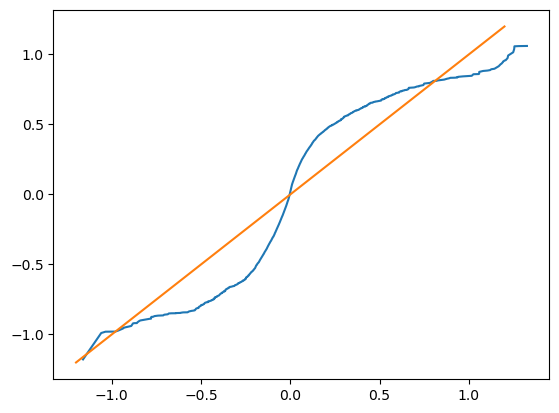

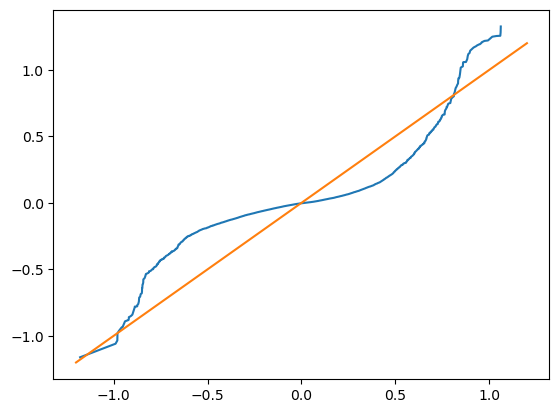

In [37]:
plt.figure()
plt.plot(prior_numpy, posterior_numpy)
plt.plot([-1.2, 1.2], [-1.2, 1.2])
plt.figure()
plt.plot(posterior_numpy, prior_numpy)
plt.plot([-1.2, 1.2], [-1.2, 1.2])